# Deep Learning Course

## Assignment 2

### Assignment Goals

* Design and implementation of CNNs.
* CNN visualization.
* Implementation of ResNet.

In this assignment, you will be asked to learn CNN models for an image dataset. Different experiments will help you achieve a better understanding of CNNs.

### Dataset

The dataset consists of around 9K images (some grayscale and some RGB) belonging to 101 classes. The shape of each image is (64,64,3). Every image is labeled with one of the classes. The image file is contained in the folder named after the class name.


### Requirements

1. **(40 points) Implement and improve a CNN model.**

   (a) We are aiming to learn a CNN on the given dataset. Download the dataset, and use Keras 2 to implement LeNet5 to classify instances. Use a one-hot encoding for labels. Split the dataset into training (90 percent) and validation (10 percent) and report the model loss (cross-entropy) and accuracy on both training and validation sets. (20 points)
   
    The LeNet5 configuration is:
      - Convolutional layer (kernel size 5 x 5, 32 filters, stride 1 x 1 and followed by ReLU)
      - Max Pooling layer with size 4 and stride 4 x 4 
      - Convolutional layer (kernel size 5 x 5, 64 filters, stride 1 x 1 and followed by ReLU)
      - Max Pooling layer with size 4 and stride 4 x 4
      - Fully Connected ReLU layer that has 1021 neurons
      - Fully Connected ReLU layer with 84 neurons
      - Fully Connected Softmax layer that has input 84 and output which is equal to the number of classes (one node for each of the classes).
      
  <span style="color:blue">Answer:</span>
  As you can see below, I implemented LeNet5 below. I trained for 25 epochs.
  - train loss: 0.23807062208652496
  - train accuracy: 0.932266354560852
  - val loss: 5.141651630401611
  - val accuracy: 0.492502897977829
      

   (b) Try to improve model accuracy on the validation dataset by tuning the model hyperparameters. You can use any improvement methods you prefer. You are expected to reach at least 65 percent accuracy on validation set. (20 points)
    
    Here are some improvement methods you can use, of course you can use others which are not mentioned here:
    - Dropout
    - L1, L2 regularization
    - Try improved initialization (e.g., Xavier initialier)
    - Batch Normalization
    
   The grading of part (b) is based on the correctness of your implementation (5 points) and the performance of your improvement on the validation set. The validation accuracy and corresponding score is:
    - 65% (5 points)
    - 67% (8 points)
    - 69% (12 points)
    - 71% (15 points)
    
    
   **Structure of LENET-5**
   
   This following LENET-5 structure is for 10-class dataset. Therefore, the layer size is not exactly the same as ours. 
   
   ![hw2_lenet5.png](hw2_lenet5.png)
    <span style="color:blue">Answer:</span>
    As you can see below, I added dropout layer, L2 regularization, Xavier initialization, and batch normalization.
    I reached to more than 67% validation accuracy.

    - train loss: 0.2854665219783783
    - train accuracy: 0.9987195730209351
    - val loss: 2.4586169719696045
    - val accuracy: 0.6758939027786255
   

2. **(20 points) Visualize layer activation**

    There are several approaches to understand and visualize convolutional Networks, including visualizing the activations and layers weights. The most straight-forward visualization technique is to show the activations of the network during the forward pass. The second most common strategy is to visualize the weights. For more information we recommend the course notes on ["Visualizing what ConvNets learn"](http://cs231n.github.io/understanding-cnn/). More advanced techniques can be found in "Visualizing and Understanding Convolutional Networks" paper by Matthew D.Zeiler and Rob Fergus.
    
    Please visualize the layer activation of **the first conv layer** and **the second conv layer** of your above CNN model (after completing Q1), on the following 2 images:
    - accordion/image_0001
    - camera/image_0001
    
   Visualizing a CNN layer activation means to visualize the result of the activation layer as an image. Specifically, the activation of the first conv layer is the output of the first (conv + ReLU) layer during forward propagation. Since we have 32 filters in the first conv layer, you should draw 32 activation images for the first conv layer. Please display multiple images side by side in a row to make your output more readable (Hint: matplotlib.pyplot.subplot).
    
    

3. **(40 points) ResNet Implementation**

    Use Keras 2 to implement ResNet 18 to classify the given dataset. Same as above, please use a one-hot encoding for labels, split the dataset into training (90 percent) and validation (10 percent) and report the model loss (cross-entropy) and accuracy on both training and validation sets. See the paper [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) for detailed introduction of ResNet. 
    
    The grading of this part is mainly based on the implementation and performance on validation set. If you need more resources to complete the training, consider using Google Colab.
    
    The ResNet 18 configuration is:
    -  conv_1 (kernel size 7 x 7, 64 filters, stride 2 x 2)
    -  conv_2 (max pooling layer with size 3 x 3, followed by 2 blocks.Each block contains two conv layers. Each conv layer has kernel size 3 x 3, 64 filters, stride 2 x 2)
    -  conv_3 (2 blocks, each contains 2 conv layers with kernel size 3*3, 128 filters)
    -  conv_4 (2 blocks, each contains 2 conv layers with kernel size 3*3, 256 filters)
    -  conv_5 (2 blocks, each contains 2 conv layers with kernel size 3*3, 512 filters)
    
   A block has the structure:
   
    ![hw2_resnet.png](hw2_resnet.png) 
    <!--<img src="attachment:image.png" alt="drawing" width="400"/>-->
    
    <span style="color:blue">Answer:</span>
    I trained the network for 200 epochs using Google Colab (please check colab.ipynb for the training process)
    - train loss: 0.004393627401441336
    - train accuracy: 0.9996159076690674
    - val loss: 2.6242754459381104
    - val accuracy: 0.5940023064613342

### Submission Notes

Please use Jupyter Notebook. The notebook should include the final code, results and your answers. You should submit your Notebook in (.pdf or .html) and .ipynb format. (penalty 10 points)

## Your Implementation

In [222]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.models import Sequential

import tensorflow
tensorflow.random.set_seed(0)
np.random.seed(0)

Dataset preprocessing:

['Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 'soccer_ball', 'stapler

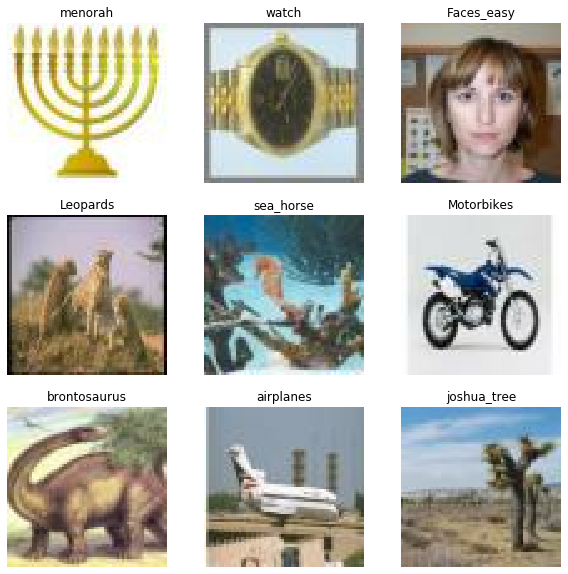

In [296]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.python.keras.utils.data_utils import Sequence
from tensorflow.keras import layers
import os
import os.path
from PIL import Image
import matplotlib.pyplot as plt

dataset_dir = '101_ObjectCategories_resized/'
num_classes= 101
batch_size = 64
image_size = (64, 64)

labels_name = sorted(os.listdir(dataset_dir))[1:]
print(labels_name)
labels_dict = {k: v for v, k in enumerate(labels_name)} # {'Faces': 0, ...}
labels_dict_reverse = {v: k for v, k in enumerate(labels_name)} # {0: 'Faces', ...}

# labels_index = np.arange(len(labels_name))
# labels_one_hot = to_categorical(labels_index)


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=batch_size, image_size=image_size,
    shuffle=True, seed=1234, validation_split=0.1, subset='training',
    interpolation='bilinear', follow_links=False
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=batch_size, image_size=image_size,
    shuffle=True, seed=1234, validation_split=0.1, subset='validation',
    interpolation='bilinear', follow_links=False
)

# visualize dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        class_label = labels[i].numpy()
        class_label = np.argmax(class_label, axis=0)
        class_label_name = labels_dict_reverse[class_label]
        plt.title(class_label_name)
        plt.axis("off")
        

#split dataset to train(90%) and validation(10%) set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [281]:
epochs = 25

model = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation="relu"),
        layers.MaxPooling2D(pool_size=(4, 4), strides=4),
        layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation="relu"),
        layers.MaxPooling2D(pool_size=(4, 4), strides=4),
        layers.Flatten(),
        layers.Dense(units=1021, activation='relu'),
        layers.Dense(units=84, activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
value_epoches1 = model.fit(train_ds, batch_size=batch_size, epochs=epochs, validation_data=val_ds)

print("_________________________________________________________________")
score = model.evaluate(train_ds, verbose=0)
print("train loss:", score[0])
print("train accuracy:", score[1])
      
score = model.evaluate(val_ds, verbose=0)
print("val loss:", score[0])
print("val accuracy:", score[1])

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 11, 11, 64)        51264     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 1021)              262397    
_________________________________________________________________
dense_95 (Dense)             (None, 84)              

Loss visualization:

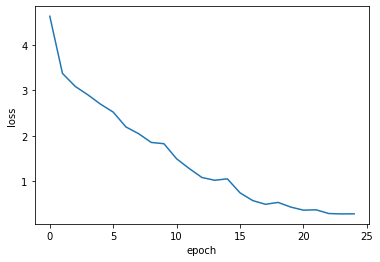

In [282]:
plt.plot(value_epoches1.history['loss'],label="loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

###  Implement and improve a CNN model

In [272]:
# implement your imoroved Lenet5 here
from tensorflow.keras.regularizers import l2

epochs = 200
l2_factor = 1e-4 
drop_out_rate = 0.4 
# kernel_regularizer=keras.regularizers.l2(l=0.1)
model2 = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), kernel_regularizer=l2(l2_factor)),
        layers.BatchNormalization(),
        layers.Activation('relu'),        
        layers.MaxPooling2D(pool_size=(4, 4), strides=4),
        layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), kernel_regularizer=l2(l2_factor)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D(pool_size=(4, 4), strides=4),
        # layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(units=1021, kernel_regularizer=l2(l2_factor)),
        # layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(rate=drop_out_rate),
        layers.Dense(units=84, kernel_regularizer=l2(l2_factor)),
        layers.Dropout(rate=drop_out_rate),
        # layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


model2.summary()

# Early Stopping?
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=2)

lr_schedule = 1e-3
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-3,
#     decay_steps=50,
#     decay_rate=0.9)

# Adam(1e-3) or SGD
model2.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), metrics=["accuracy"])
value_epoches2 = model2.fit(train_ds, batch_size=batch_size, epochs=epochs, validation_data=val_ds) 
#, callbacks=[callback])

# model2.save('model2')
# model2 = keras.models.load_model('model2')

print("_________________________________________________________________")
score = model2.evaluate(train_ds, verbose=0)
print("train loss:", score[0])
print("train accuracy:", score[1])
      
score = model2.evaluate(val_ds, verbose=0)
print("val loss:", score[0])
print("val accuracy:", score[1])


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
batch_normalization_77 (Batc (None, 60, 60, 32)        128       
_________________________________________________________________
activation_113 (Activation)  (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 11, 11, 64)        51264     
_________________________________________________________________
batch_normalization_78 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
activation_114 (Activation)  (None, 11, 11, 64)      

Epoch 40/200
123/123 [==============================] - 17s 141ms/step - loss: 0.8708 - accuracy: 0.7885 - val_loss: 3.1149 - val_accuracy: 0.4729
Epoch 41/200
123/123 [==============================] - 17s 136ms/step - loss: 1.4137 - accuracy: 0.6749 - val_loss: 1.8268 - val_accuracy: 0.6344
Epoch 42/200
123/123 [==============================] - 17s 135ms/step - loss: 1.0442 - accuracy: 0.7554 - val_loss: 1.8694 - val_accuracy: 0.6194
Epoch 43/200
123/123 [==============================] - 17s 135ms/step - loss: 0.9530 - accuracy: 0.7783 - val_loss: 1.7386 - val_accuracy: 0.6551
Epoch 44/200
123/123 [==============================] - 17s 135ms/step - loss: 0.8629 - accuracy: 0.8017 - val_loss: 2.0656 - val_accuracy: 0.5859
Epoch 45/200
123/123 [==============================] - 17s 138ms/step - loss: 1.2543 - accuracy: 0.7047 - val_loss: 1.7661 - val_accuracy: 0.6286
Epoch 46/200
123/123 [==============================] - 17s 135ms/step - loss: 0.8709 - accuracy: 0.7987 - val_loss: 1

Epoch 96/200
123/123 [==============================] - 17s 134ms/step - loss: 0.6556 - accuracy: 0.8783 - val_loss: 2.4286 - val_accuracy: 0.6609
Epoch 97/200
123/123 [==============================] - 17s 136ms/step - loss: 0.4863 - accuracy: 0.9229 - val_loss: 2.1301 - val_accuracy: 0.6609
Epoch 98/200
123/123 [==============================] - 17s 135ms/step - loss: 0.5493 - accuracy: 0.9053 - val_loss: 2.1625 - val_accuracy: 0.6413
Epoch 99/200
123/123 [==============================] - 17s 135ms/step - loss: 0.6979 - accuracy: 0.8612 - val_loss: 2.1456 - val_accuracy: 0.6701
Epoch 100/200
123/123 [==============================] - 17s 136ms/step - loss: 0.6742 - accuracy: 0.8729 - val_loss: 2.3367 - val_accuracy: 0.6413
Epoch 101/200
123/123 [==============================] - 18s 142ms/step - loss: 0.4788 - accuracy: 0.9297 - val_loss: 2.3490 - val_accuracy: 0.6355
Epoch 102/200
123/123 [==============================] - 18s 142ms/step - loss: 0.4807 - accuracy: 0.9290 - val_loss

123/123 [==============================] - 21s 172ms/step - loss: 0.4351 - accuracy: 0.9527 - val_loss: 2.2356 - val_accuracy: 0.6713
Epoch 152/200
123/123 [==============================] - 20s 159ms/step - loss: 0.4271 - accuracy: 0.9462 - val_loss: 2.4106 - val_accuracy: 0.6517
Epoch 153/200
123/123 [==============================] - 17s 140ms/step - loss: 0.5382 - accuracy: 0.9233 - val_loss: 2.3029 - val_accuracy: 0.6586
Epoch 154/200
123/123 [==============================] - 16s 133ms/step - loss: 0.4417 - accuracy: 0.9478 - val_loss: 2.3295 - val_accuracy: 0.6701
Epoch 155/200
123/123 [==============================] - 16s 133ms/step - loss: 0.4140 - accuracy: 0.9545 - val_loss: 2.3099 - val_accuracy: 0.6724
Epoch 156/200
123/123 [==============================] - 16s 133ms/step - loss: 0.4560 - accuracy: 0.9406 - val_loss: 2.4590 - val_accuracy: 0.6644
Epoch 157/200
123/123 [==============================] - 17s 134ms/step - loss: 0.3985 - accuracy: 0.9563 - val_loss: 2.4089 -

Loss visualization:

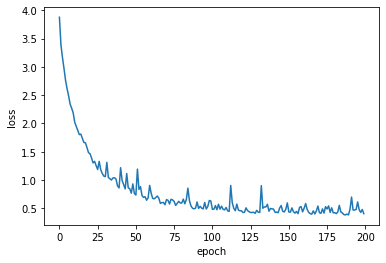

In [273]:
plt.plot(value_epoches2.history['loss'],label="loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

Accuracy visualization:

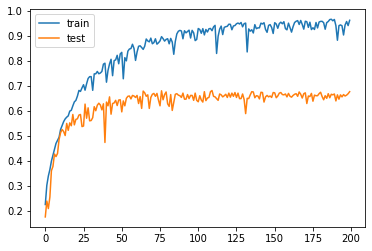

In [274]:
# summarize history for accuracy
plt.plot(value_epoches2.history['accuracy'], label='train')
plt.plot(value_epoches2.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### Visualize layer activation

/Users/mahsa/anaconda3/envs/cmpt728/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


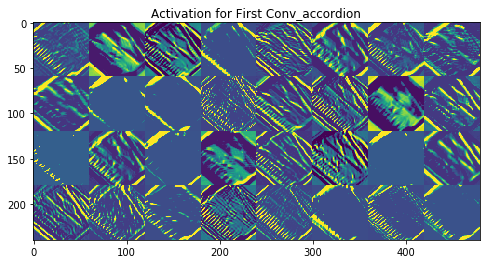

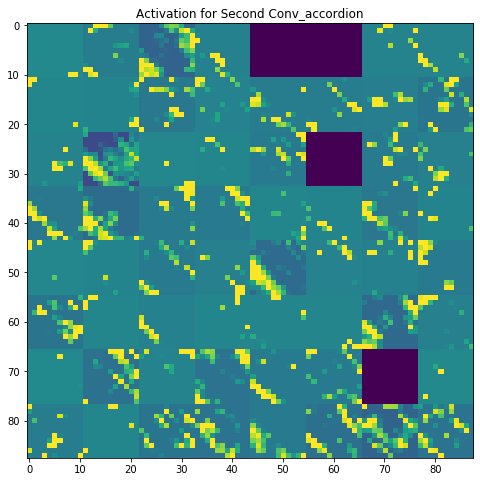

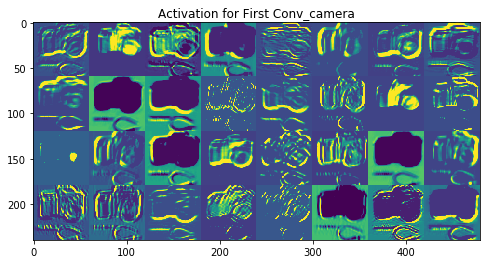

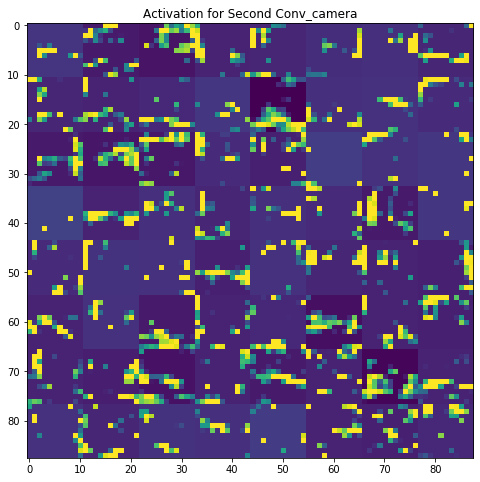

In [303]:
# implement your visualization here
from keras.preprocessing import image

# Extracts the outputs of the top 7 layers
layer_outputs = [layer.output for layer in model2.layers[:7]] 

# Creates a model that will return these outputs, given the model input
activation_model = keras.models.Model(inputs=model2.input, outputs=layer_outputs)

def viz_activation_conv(layer_num, img_path, output_title):
    
    img = image.load_img(img_path)
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)

    # Returns a list of five Numpy arrays: one array per layer activation
    activations = activation_model.predict(img_tensor) 

    layer_activation = activations[layer_num]
    
    # process display images side by side
    images_per_row = 8
    n_features = layer_activation.shape[-1] 
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row 
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols): 
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            # Post-processes the feature for better visualization
            channel_image -= channel_image.mean() 
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(output_title)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

img_path1 = dataset_dir+'accordion/image_0001.jpg'
img_path2 = dataset_dir+'camera/image_0001.jpg'

viz_activation_conv(2, img_path1, "Activation for First Conv_accordion")
viz_activation_conv(6, img_path1, "Activation for Second Conv_accordion")

viz_activation_conv(2, img_path2, "Activation for First Conv_camera")
viz_activation_conv(6, img_path2, "Activation for Second Conv_camera")

### ResNet Implementation

In [308]:
# implement a ResNet model here

num_classes = 101
image_size = (64, 64)

batch_size = 64
epochs = 100

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))
    
    # conv_1
    x = layers.Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    
    # conv_2
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding="same")(x)

    x_shortcut = x  # Set aside residual

    for filters in [64, 128, 256, 512]:

        # Block 1
        x = layers.Conv2D(filters, kernel_size=(3, 3), strides=(2, 2), padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        
        x = layers.Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding="same")(x)
        x = layers.BatchNormalization()(x)
 
        # in order to match the changed dimension
        x_shortcut = layers.Conv2D(filters, kernel_size=(1, 1), strides=(1, 1), padding="same")(x)
        x = layers.add([x, x_shortcut])
       
        x = layers.Activation("relu")(x)
        x_shortcut = x  
        
        # Block 2
        x = layers.Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        
        x = layers.Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.add([x, x_shortcut])  
        x = layers.Activation("relu")(x)
        x_shortcut = x

        
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
ResNet18 = get_model(image_size, num_classes)

ResNet18.summary()

sgd = keras.optimizers.SGD(lr=1e-3, momentum=0.9)
adam = keras.optimizers.Adam(1e-4)

ResNet18.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
value_epoches3 = ResNet18.fit(train_ds, batch_size=batch_size, epochs=epochs, validation_data=val_ds)

print("_________________________________________________________________")
score = ResNet18.evaluate(train_ds, verbose=0)
print("train loss:", score[0])
print("train accuracy:", score[1])
      
score = ResNet18.evaluate(val_ds, verbose=0)
print("val loss:", score[0])
print("val accuracy:", score[1])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

123/123 [==============================] - 153s 1s/step - loss: 4.3809 - accuracy: 0.1965 - val_loss: 4.9941 - val_accuracy: 0.0150
Epoch 2/100
123/123 [==============================] - 144s 1s/step - loss: 3.6823 - accuracy: 0.2584 - val_loss: 7.8650 - val_accuracy: 0.0761
Epoch 3/100
123/123 [==============================] - 144s 1s/step - loss: 3.0711 - accuracy: 0.3412 - val_loss: 3.4002 - val_accuracy: 0.2791
Epoch 4/100
123/123 [==============================] - 135s 1s/step - loss: 2.7905 - accuracy: 0.3795 - val_loss: 3.4797 - val_accuracy: 0.2791
Epoch 5/100
123/123 [==============================] - 136s 1s/step - loss: 2.7729 - accuracy: 0.3813 - val_loss: 3.2585 - val_accuracy: 0.3206
Epoch 6/100
123/123 [==============================] - 136s 1s/step - loss: 2.3627 - accuracy: 0.4569 - val_loss: 3.1404 - val_accuracy: 0.3241
Epoch 7/100
123/123 [==============================] - 137s 1s/step - loss: 2.9776 - accuracy: 0.3500 - val_loss: 3.1930 - val_accuracy: 0.3218
Epoc

123/123 [==============================] - 138s 1s/step - loss: 1.7073 - accuracy: 0.5664 - val_loss: 2.3306 - val_accuracy: 0.4775
Epoch 58/100
123/123 [==============================] - 137s 1s/step - loss: 1.4061 - accuracy: 0.6329 - val_loss: 2.5278 - val_accuracy: 0.4418
Epoch 59/100
123/123 [==============================] - 138s 1s/step - loss: 1.5600 - accuracy: 0.5937 - val_loss: 2.6667 - val_accuracy: 0.4198
Epoch 60/100
123/123 [==============================] - 134s 1s/step - loss: 2.1348 - accuracy: 0.4937 - val_loss: 2.7411 - val_accuracy: 0.4360
Epoch 61/100
123/123 [==============================] - 136s 1s/step - loss: 1.7256 - accuracy: 0.5686 - val_loss: 2.6442 - val_accuracy: 0.4291
Epoch 62/100
123/123 [==============================] - 142s 1s/step - loss: 1.4784 - accuracy: 0.6175 - val_loss: 2.1524 - val_accuracy: 0.5063
Epoch 63/100
123/123 [==============================] - 142s 1s/step - loss: 1.2751 - accuracy: 0.6691 - val_loss: 2.1117 - val_accuracy: 0.523

Loss visualization:

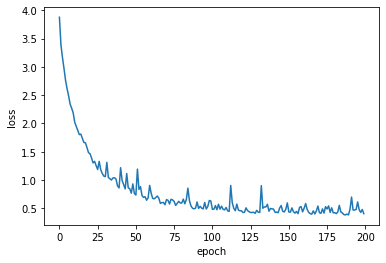

In [310]:
plt.plot(value_epoches2.history['loss'],label="loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()